In [1]:
import os, cv2, glob
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import pyramid_reduce 
plt.style.use('dark_background')

In [2]:
os.chdir('C:\\Users\\Yu_zzong\\Desktop\\Jupyter\\GAN2')
base_path = 'C:\\Users\\Yu_zzong\\Desktop\\Jupyter\\GAN2'
img_base_path = os.path.join(base_path, 'Traffic_Sign_or')
target_img_path = os.path.join(base_path, 'processed')

base_path2 = 'E:\\'
target_img_path2 = os.path.join(base_path2, 'processed')
#%%
print(target_img_path)
print(target_img_path2)
eval_list = np.loadtxt(os.path.join(base_path, 'list_eval_partition_ORG.csv'),
                       dtype=str,
                       delimiter=',',
                       skiprows=1)
#%%
img_sample = cv2.imread(os.path.join(img_base_path, 
                                     eval_list[0][0]))

h, w, _ = img_sample.shape
print(eval_list)
print(h)
print(w)
print(_)

C:\Users\Yu_zzong\Desktop\Jupyter\GAN2\processed
E:\processed
[['000001.jpg' '0']
 ['000002.jpg' '0']
 ['000003.jpg' '0']
 ...
 ['016578.jpg' '0']
 ['016579.jpg' '0']
 ['016580.jpg' '0']]
1440
1920
3


In [3]:
eval_list = np.loadtxt(os.path.join(base_path, 'list_eval_partition.csv'), dtype=str, delimiter=',', skiprows=1)
eval_list[0]

#여기아래부터 수정

array(['000001.jpg', '0'], dtype='<U10')

(165, 186, 3)


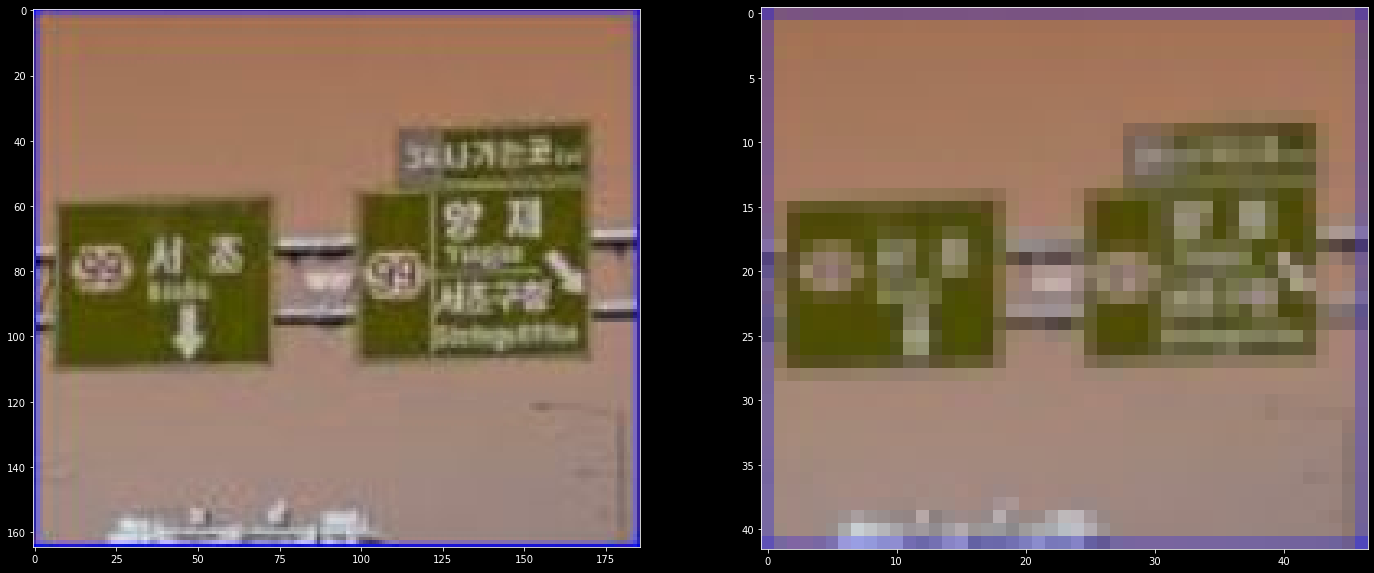

In [4]:
###d여기부터수정안함
img_sample = cv2.imread('C:/Users/Yu_zzong/Desktop/Jupyter/GAN2/processed/000001.JPG')
h, w, _ = img_sample.shape
crop_sample = img_sample
resized_sample = pyramid_reduce(crop_sample, downscale=4,multichannel=True)
print(crop_sample.shape)
plt.figure(figsize=(50, 10))
plt.subplot(1, 4, 1)
plt.imshow(crop_sample)
plt.subplot(1, 4, 2)
plt.imshow(resized_sample)

In [5]:
#%%
img_sample = cv2.imread(os.path.join(img_base_path, 
                                     eval_list[0][0]))

h, w, _ = img_sample.shape

# 정사각형 이미지로 crop 해준다.
crop_sample = img_sample[int((h-w)/2):int(-(h-w)/2), :] 

# 이미지를 4배만큼 축소하고 normalize 한다.
resized_sample = pyramid_reduce(crop_sample, 
                                downscale=4,
                                multichannel=True) # 컬러채널 허용

pad = int((crop_sample.shape[0] - resized_sample.shape[0]) / 2)

padded_sample = cv2.copyMakeBorder(resized_sample,
                                   top=pad,
                                   bottom=pad,
                                   left=pad,
                                   right=pad,
                                   borderType=cv2.BORDER_CONSTANT,
                                   value=(0,0,0))

print(crop_sample.shape, padded_sample.shape)

fig, ax = plt.subplots(1,4,figsize=(12,5))

ax=ax.ravel()

ax[0].imshow(img_sample)
ax[1].imshow(crop_sample)
ax[2].imshow(resized_sample)
#ax[2].imshow(cv2.resize(resized_sample,dsize=(45, 45)))
ax[3].imshow(padded_sample)

C:\Users\Yu_zzong\anaconda3\lib\site-packages\skimage\transform\_warps.py:104: RuntimeWarning: invalid value encountered in true_divide
  np.asarray(output_shape, dtype=float))


LinAlgError: SVD did not converge

In [3]:
downscale = 4
n_train = 162770
n_val = 19867
n_test = 19962


for i, e in enumerate(eval_list):
    filename, ext = os.path.splitext(e[0])
    
    img_path = os.path.join(img_base_path, e[0])
    
    img = cv2.imread(img_sample)
    
    h, w, _ = img.shape
    
    #crop = img[int((h-w)/2):int(-(h-w)/2), :]
    crop = cv2.resize(img, dsize=(800,800))
    resized = pyramid_reduce(crop, downscale=downscale, multichannel=True)
    
    norm = cv2.normalize(crop.astype(np.float64), None, 0, 1, cv2.NORM_MINMAX)
    
    np.save(os.path.join(target_img_path2, 'x_test', filename + '.npy'), resized)
    np.save(os.path.join(target_img_path2, 'y_test', filename + '.npy'), norm)  

In [5]:
img = cv2.imread('C:/Users/Yu_zzong/Desktop/Jupyter/GAN2/processed/000001.JPG')
downscale = 4
h, w, _ = img.shape
    
#crop = img[int((h-w)/2):int(-(h-w)/2), :]
crop = cv2.resize(img, dsize=(200,200))
#resized = pyramid_reduce(crop, downscale=downscale, multichannel=True)    
norm = cv2.normalize(crop.astype(np.float64), None, 0, 1, cv2.NORM_MINMAX)
#np.save(os.path.join(target_img_path2, 'x_test','000001.npy'), resized) #
np.save(os.path.join(target_img_path2, 'y_test','000000.npy'), norm)   # 200

In [40]:
import cv2, sys
from matplotlib import pyplot as plt
import numpy as np

In [41]:
image = cv2.imread(os.path.join(img_base_path, eval_list[0][0]))
image_gray = cv2.imread(os.path.join(img_base_path, eval_list[0][0]),cv2.IMREAD_GRAYSCALE)

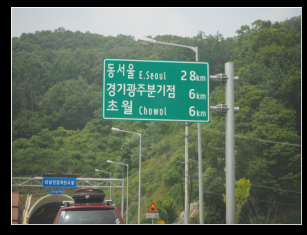

In [43]:
b,g,r = cv2.split(image)
image2 = cv2.merge([r,g,b])
 
plt.imshow(image2)
plt.xticks([])
plt.yticks([])
plt.show()

In [39]:
cv2.imshow('image', image)
cv2.imshow('image_gray', image_gray)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
blur = cv2.GaussianBlur(image_gray, ksize=(9,9), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

In [9]:
edged = cv2.Canny(blur, 10, 250)
cv2.imshow('Edged', edged)
cv2.waitKey(0)

-1

In [21]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2.imshow('closed', closed)
cv2.waitKey(0)


-1

In [22]:
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

In [23]:
contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 3)
cv2.imshow('contours_image', contours_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
contours_xy = np.array(contours)
contours_xy.shape

(17,)

In [34]:
# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)


0
1510
349
1439


In [35]:
# image trim 하기
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min

In [36]:
img_trim = image[y:y+h, x:x+w]
cv2.imwrite('org_trim.jpg', img_trim)
org_image = cv2.imread('org_trim.jpg')

In [37]:
cv2.imshow('org_image', org_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
resize_img = cv2.resize(org_image, (300, 300))
print("resize_img.shape = {0}".format(resize_img.shape))

cv2.imshow("resize img", resize_img)
cv2.waitKey()

resize_img.shape = (300, 300, 3)


-1